A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply. You are a data scientist, who has to come up with useful insights using the data and make prediction models to forecast the sales for X number of months/years.

who has to come up with useful insights using the data


make prediction models to forecast the sales for X number of months/years.

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
data=pd.read_csv("Walmart (1).csv",encoding = "ISO-8859-1")

In [93]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [94]:
datas=pd.read_csv("Walmart (1).csv")

In [95]:
datas

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [96]:
datas.set_index('Date', inplace=True)


In [97]:
a= int(input("Enter the store id:"))
store = datas[datas.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id:7


Weekly_Sales    float64
dtype: object

In [12]:
sales

,Weekly_Sales
Date,
01-04-2011,1900246.47
01-06-2012,2179360.94
01-07-2011,2051533.53
01-10-2010,1842821.02
02-03-2012,2206319.90
...,...
30-07-2010,1796637.61
30-09-2011,1929486.63
30-12-2011,2007105.86


In [13]:
sales.reset_index(inplace = True)
#converting 'date' column to a datetime type
sales['Date'] = pd.to_datetime(sales['Date'])
# resetting date back to the index
sales.set_index('Date',inplace = True)

In [14]:
sales

,Weekly_Sales
Date,
2011-01-04,1900246.47
2012-01-06,2179360.94
2011-01-07,2051533.53
2010-01-10,1842821.02
2012-02-03,2206319.90
...,...
2010-07-30,1796637.61
2011-09-30,1929486.63
2011-12-30,2007105.86


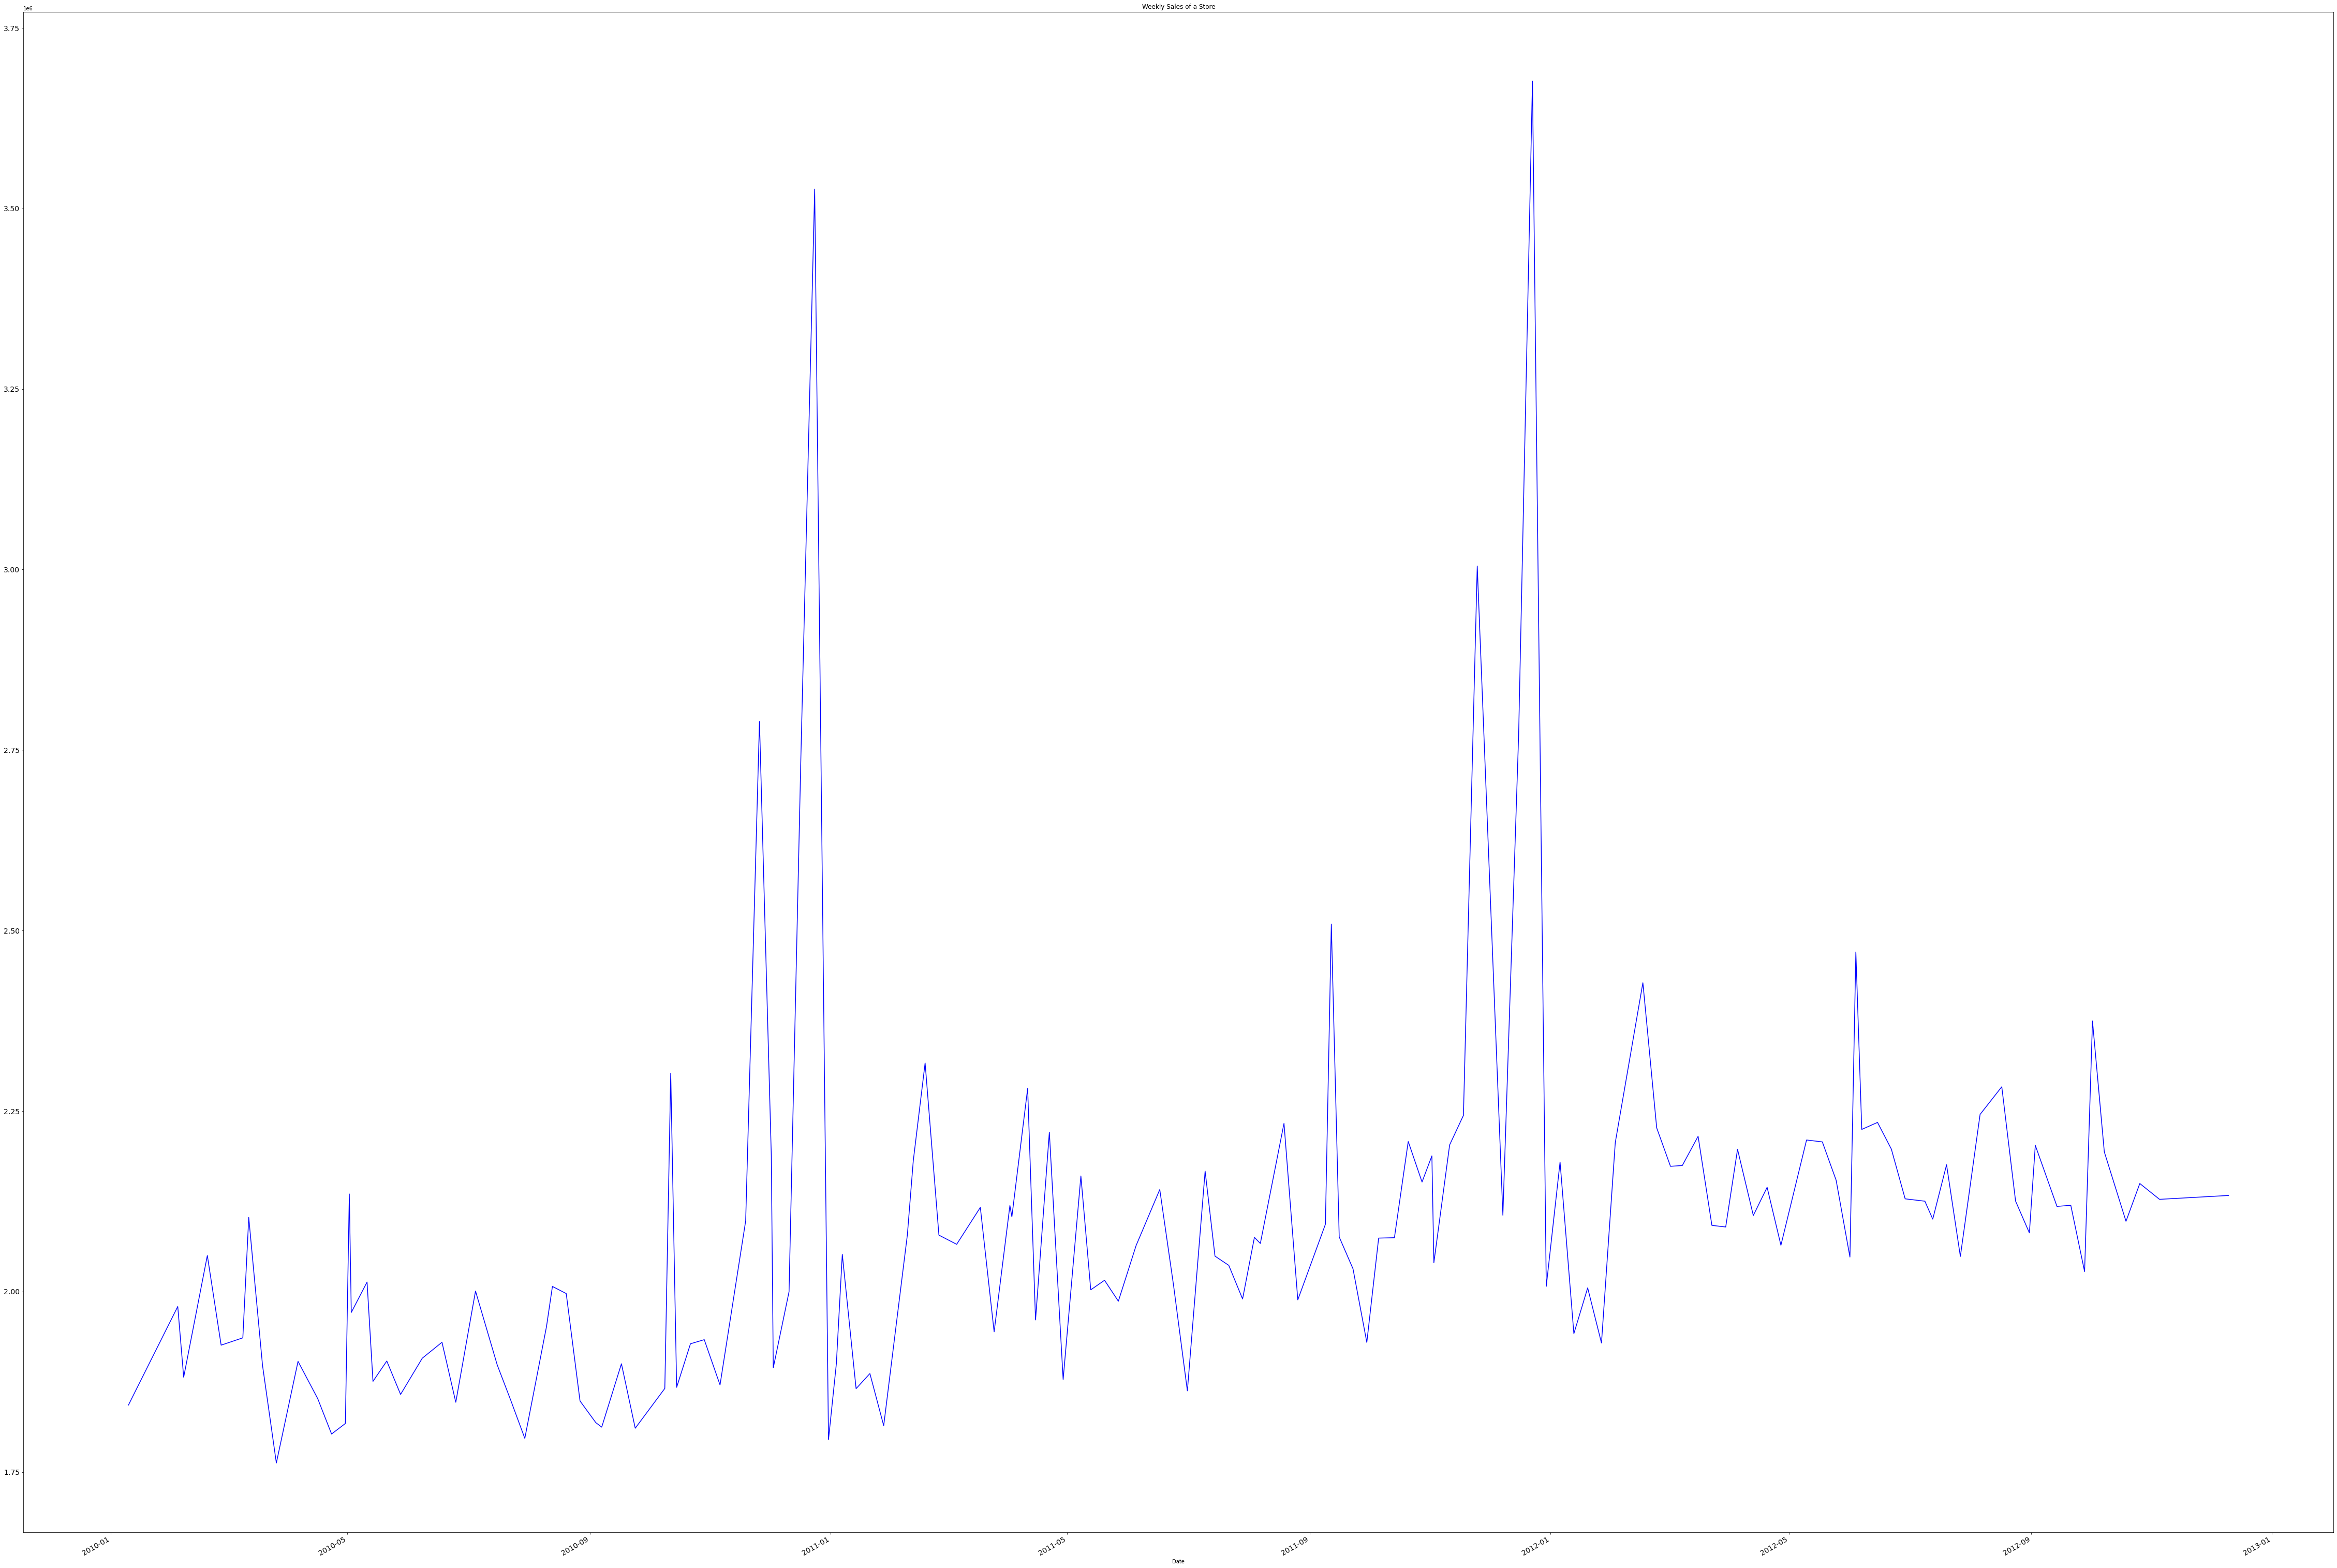

In [15]:
sales.Weekly_Sales.plot(figsize=(80,60), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

during the year 2011 maximum peak 

<Figure size 432x288 with 0 Axes>

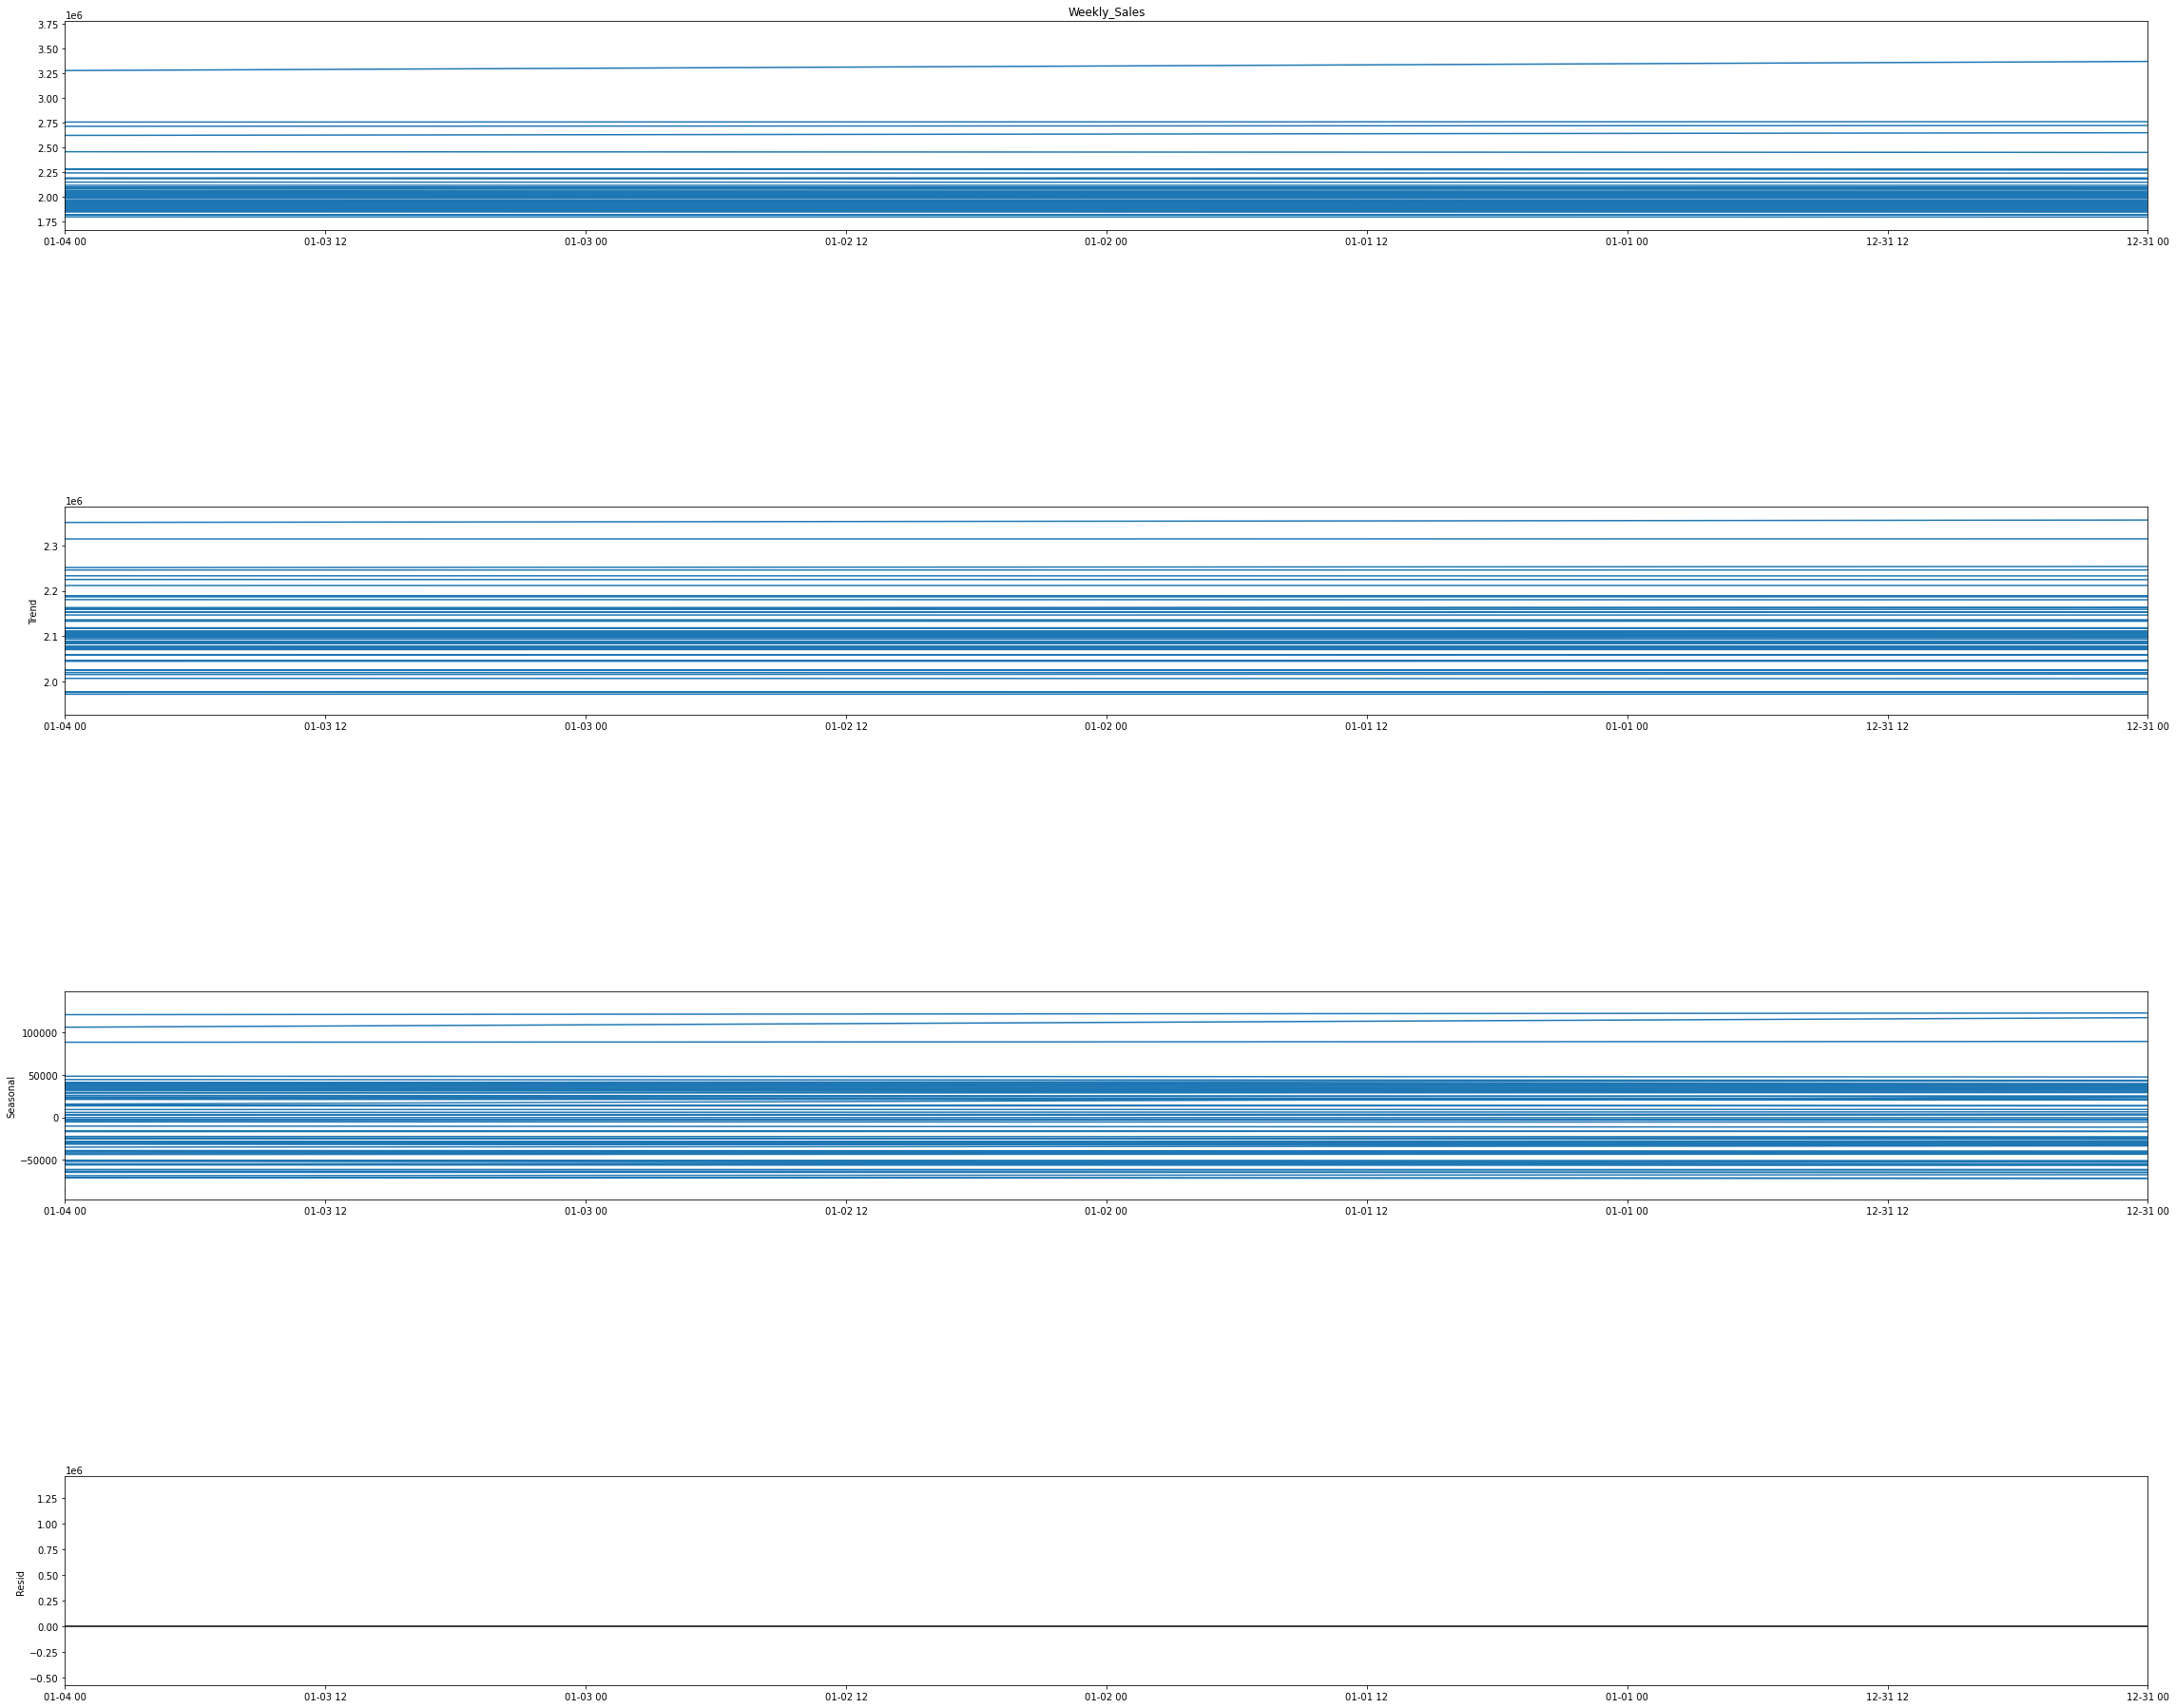

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(40,30)
plt.show()

In [17]:
#lets compare the 2012 data of two stores
# Lets take store 5 data for analysis
store5 = datas[datas.Store == 5]
# there are about 45 different stores in this dataset.

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes
# Grouped weekly sales by store 6

#remove date from index to change its dtype because it clearly isnt acceptable.
sales5.reset_index(inplace = True)

#converting 'date' column to a datetime type
sales5['Date'] = pd.to_datetime(sales5['Date'])
# resetting date back to the index
sales5.set_index('Date',inplace = True)

In [18]:
sales5

,Weekly_Sales
Date,
2011-01-04,314316.55
2012-01-06,359867.80
2011-01-07,327093.89
2010-01-10,283178.12
2012-02-03,359206.21
...,...
2010-07-30,268929.03
2011-09-30,292315.38
2011-12-30,349624.88


In [19]:
yr1=sales.Weekly_Sales
yr2=sales5.Weekly_Sales

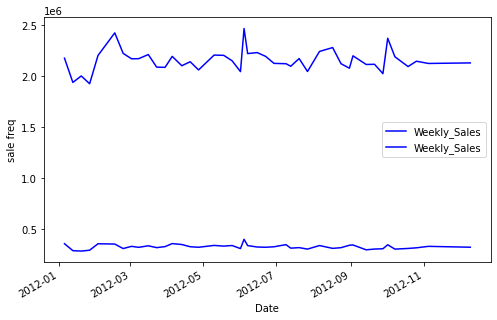

In [20]:
yr1['2012'].plot(figsize=(8,5),legend=True,color='blue')
yr2['2012'].plot(figsize=(8,5),legend=True,color='blue')
plt.ylabel('sale freq')
plt.show()

store 2 has higher sales than store 5

irregularities in sales

using seasonal arima

In [21]:
import statsmodels.api as sm

model_sa= sm.tsa.statespace.SARIMAX(yr1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)
fit_model=model_sa.fit()

/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been pr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.11767D+00    |proj g|=  2.95683D-01


 This problem is unconstrained.



At iterate    5    f=  8.93486D+00    |proj g|=  1.87701D-01

At iterate   10    f=  8.82675D+00    |proj g|=  3.05993D-01

At iterate   15    f=  8.81306D+00    |proj g|=  7.44070D-02

At iterate   20    f=  8.80911D+00    |proj g|=  1.62972D-01

At iterate   25    f=  8.80510D+00    |proj g|=  1.96589D-01

At iterate   30    f=  8.79749D+00    |proj g|=  2.84986D-01

At iterate   35    f=  8.79705D+00    |proj g|=  5.11348D-01

At iterate   40    f=  8.79059D+00    |proj g|=  8.92559D-02

At iterate   45    f=  8.79053D+00    |proj g|=  4.84244D-02

At iterate   50    f=  8.79052D+00    |proj g|=  3.92223D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
fit_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                        Weekly_Sales   No. Observations:                  143
Model:             SARIMAX(4, 4, 3)x(1, 1, [], 52)   Log Likelihood               -1257.045
Date:                             Fri, 21 Apr 2023   AIC                           2532.090
Time:                                     17:37:15   BIC                           2554.283
Sample:                                          0   HQIC                          2541.027
                                             - 143                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0346      0.335     -3.084      0.002      -1.692      -0.377
ar.L2         -0.8760      0.383     -2.287      0.022      -1.627      -0.125
ar.L3         -0.6012      0.337     -1.786      0.074      -1.261       0.059
ar.L4         -0.6410      0.210     -3.045      0.002      -1.054      -0.228
ma.L1         -2.2762      0.360     -6.321      0.000      -2.982      -1.570
ma.L2          1.5774      0.690      2.285      0.022       0.224       2.930
ma.L3         -0.2983      0.354     -0.843      0.399      -0.992       0.395
ar.S.L52      -0.2917      0.145     -2.007      0.045      -0.577      -0.007
sigma2      3.419e+11   1.01e-12   3.38e+23      0.000    3.42e+11    3.42e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               142.38
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             1.55
Prob(H) (two-sided):                  0.85   Kurtosis:                         8.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.92e+40. Standard errors may be unstable.
"""

auto regulation and moving average r low 

In [23]:
#visualising

/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


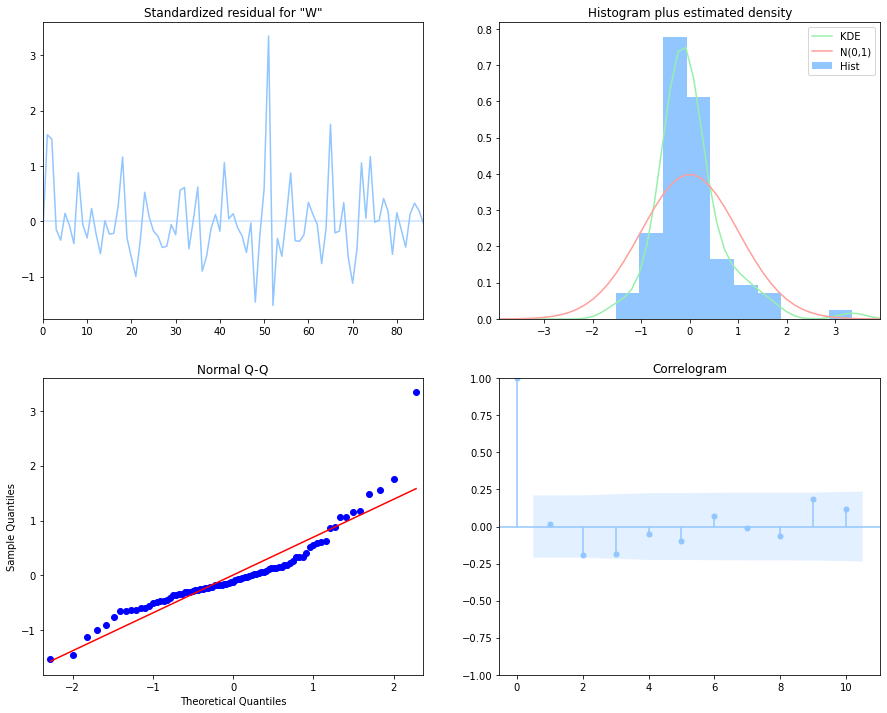

In [24]:
plt.style.use('seaborn-pastel')
fit_model.plot_diagnostics(figsize=(15, 12))
plt.show()

prediction

In [25]:
pred = fit_model.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

/var/folders/dv/4cwdvr1n0g97w3y41jd2jwym0000gn/T/ipykernel_1905/2457130201.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = yr1['2010':].plot(label='observed')


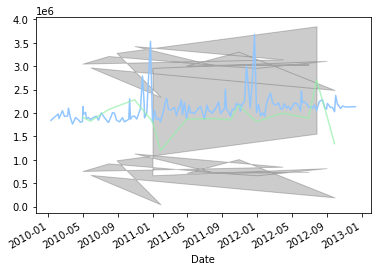

In [26]:
ax = yr1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

for 5th store 

/var/folders/dv/4cwdvr1n0g97w3y41jd2jwym0000gn/T/ipykernel_1905/2978941641.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = yr2['2010':].plot(label='observed')


Text(0, 0.5, 'sales')

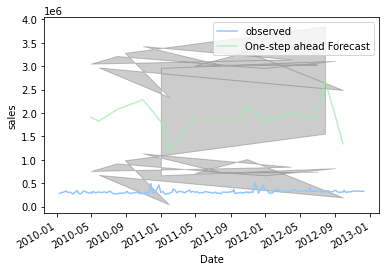

In [27]:
ax = yr2['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
plt.legend()
ax.set_ylabel("sales")

In [28]:
y_forecasted = pred.predicted_mean
y_truth = yr1['2012-7-27':]

mse

In [29]:
mse = ((y_forecasted - y_truth) ** 2).mean()
mse


303464357325.90436

high mse

In [30]:
pred_dynamic = fit_model.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

/var/folders/dv/4cwdvr1n0g97w3y41jd2jwym0000gn/T/ipykernel_1905/1638329781.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = yr1['2010':].plot(label='observed', figsize=(12, 8))


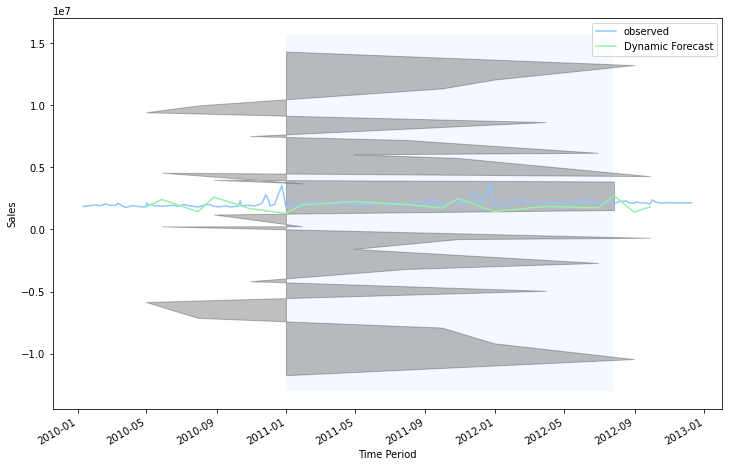

In [31]:


ax = yr1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), yr1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

In [32]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    2.705010e+06
2010-08-27    2.590841e+06
2011-01-28    1.977916e+06
2010-05-28    2.399018e+06
2012-09-28    1.800764e+06
2011-10-28    2.480954e+06
2011-04-29    2.231582e+06
2012-06-29    1.729771e+06
2011-07-29    1.999773e+06
2010-10-29    1.668337e+06
2012-03-30    1.843144e+06
2010-04-30    1.788706e+06
2010-07-30    1.424410e+06
2011-09-30    1.717042e+06
2011-12-30    1.440184e+06
2012-08-31    1.390568e+06
2010-12-31    1.286822e+06
Name: predicted_mean, dtype: float64


In [33]:
import numpy as np
# Extract the predicted and true values of our time series
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    2.705010e+06
2010-08-27    2.590841e+06
2011-01-28    1.977916e+06
2010-05-28    2.399018e+06
2012-09-28    1.800764e+06
2011-10-28    2.480954e+06
2011-04-29    2.231582e+06
2012-06-29    1.729771e+06
2011-07-29    1.999773e+06
2010-10-29    1.668337e+06
2012-03-30    1.843144e+06
2010-04-30    1.788706e+06
2010-07-30    1.424410e+06
2011-09-30    1.717042e+06
2011-12-30    1.440184e+06
2012-08-31    1.390568e+06
2010-12-31    1.286822e+06
Name: predicted_mean, dtype: float64


In [34]:
y_truth = yr1['2012-7-27':]

print(y_truth)

Date
2012-08-06    2245257.18
2012-09-03    2202450.81
2012-10-02    2374660.64
2012-10-08    2193367.69
2012-11-05    2127661.17
2012-12-10    2133026.07
2012-09-14    2117854.60
2012-08-17    2283540.30
2012-10-19    2097266.85
2012-09-21    2119438.53
2012-08-24    2125241.68
2012-10-26    2149594.46
2012-07-27    2048613.65
2012-09-28    2027620.23
2012-08-31    2081181.35
Name: Weekly_Sales, dtype: float64


In [35]:
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 565469.32


In [36]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1573866.0238878613


In [37]:
pred_uc = fit_model.get_forecast(steps=12)

print(pred_uc)

/Users/adnan/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [38]:
pred_ci = pred_uc.conf_int()

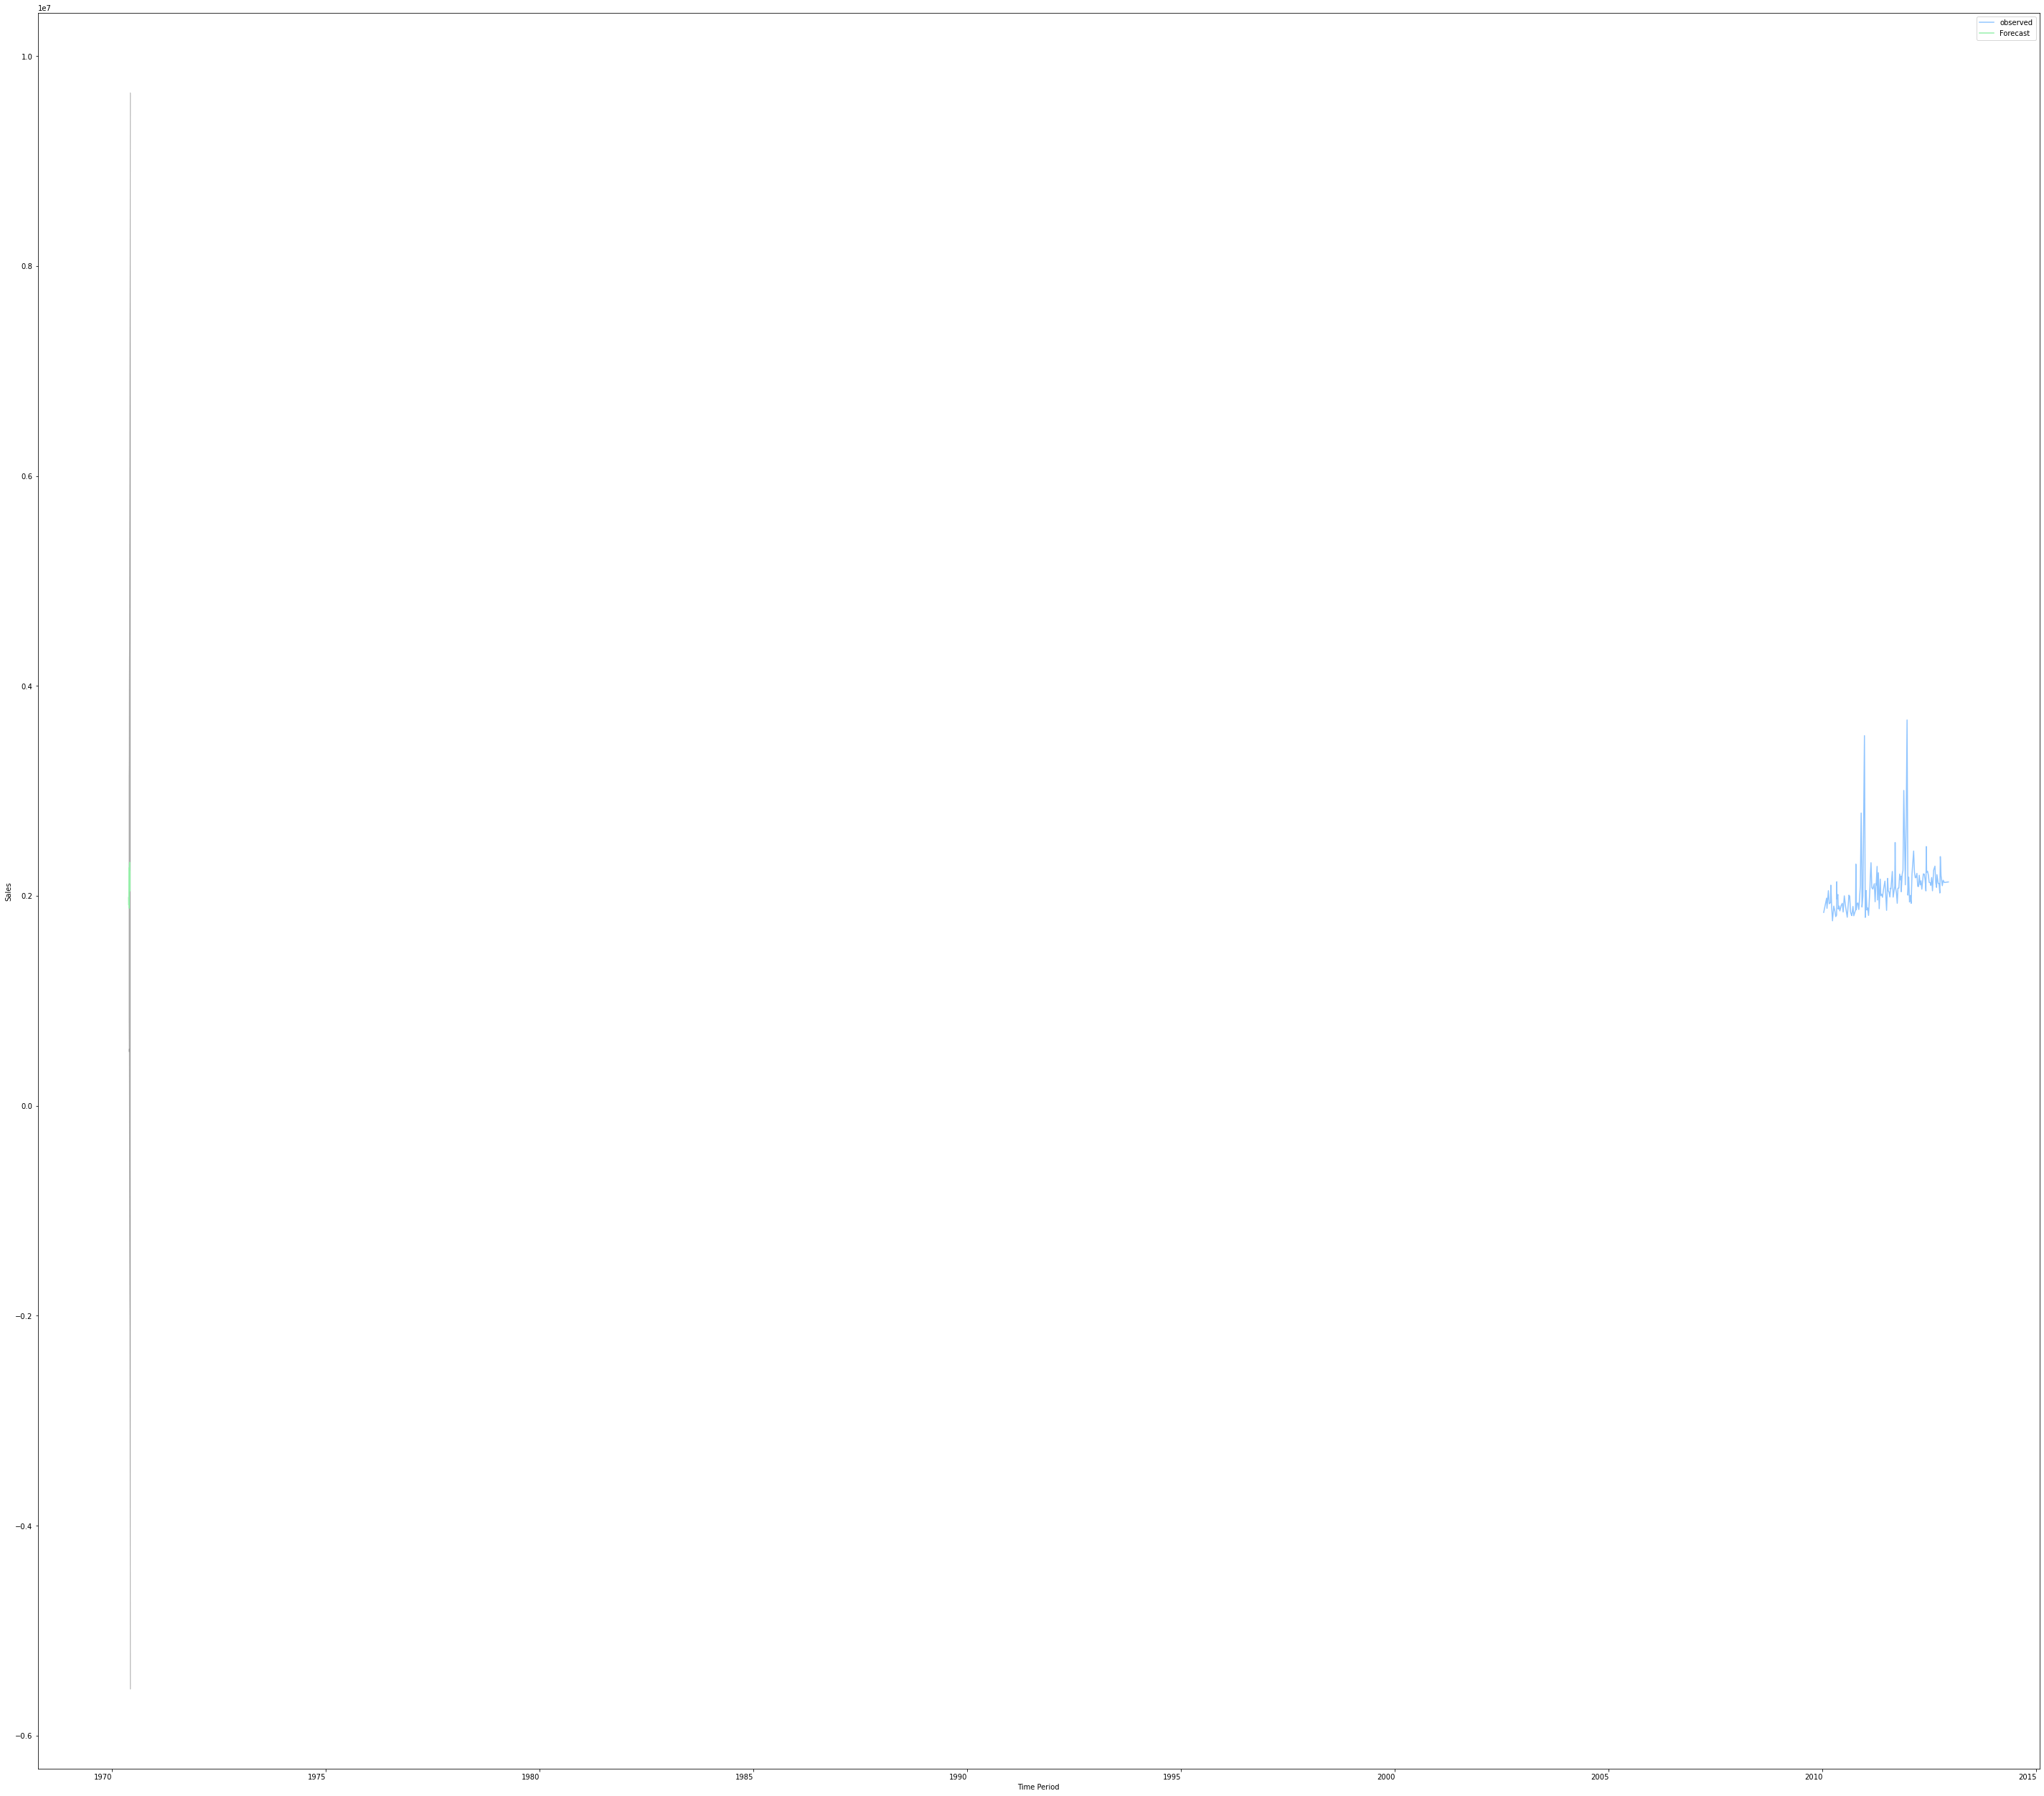

In [39]:
ax = yr1.plot(label='observed', figsize=(50,50))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

# first part done

# Using the above data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.


# Segment the customers based on their purchasing behavior.

## we can segment by using k means algorithm or just segrete them

In [41]:
data1 = pd.read_csv('OnlineRetail (3).csv',encoding='ISO-8859-1')

In [42]:
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [43]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


 # 406829 non-null in CustomerID

In [44]:
data1.groupby(['UnitPrice'])

In [45]:
data1.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [46]:
data1.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [49]:
df_null=round(100*(data1.isnull().sum())/len(data1),2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [50]:
data1['CustomerID'].value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [52]:
data1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


# money 

In [53]:
da_m=data1.groupby('CustomerID')['Amount'].sum()

In [55]:
da_m=pd.DataFrame(da_m)

In [56]:
da_m.reset_index(inplace=True)

In [57]:
da_m

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


# freq

In [58]:
da_f=data1.groupby('CustomerID')['InvoiceNo'].count()

In [60]:
da_f=pd.DataFrame(da_f)

In [61]:
da_f.reset_index(inplace=True)

In [62]:
da_f

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4367,18280.0,10
4368,18281.0,7
4369,18282.0,13
4370,18283.0,756


# recency

In [70]:
max_date=max(data1['InvoiceDate'])

In [80]:
data1['InvoiceDate']=pd.to_datetime(data1['InvoiceDate'])

In [83]:
max_date=max(data1['InvoiceDate'])

In [84]:
data1['diff']=max_date-data1['InvoiceDate']

In [86]:
data1['diff']=max_date - data1['InvoiceDate']

In [87]:
da_r=data1.groupby('CustomerID')['diff'].min()

In [89]:
da_r=pd.DataFrame(da_r)

In [90]:
da_r=da_r.reset_index(inplace=True)

## giving the output

In [ ]:
print("1) recenecy  2) frequency 3)capital")
choice=int(input('enter choice'))
while(ans.lower()=="y"):
    if choice==1:
        print(da_r)
        ans=input('you wanna cont. (y/n)')
    elif choice==2:
        print(da_f)
        ans=input('you wanna cont. (y/n)')    
    elif choice==3:
        print(da_m)
        ans=input('you wanna cont. (y/n)')
    else:
        print('wrong choice')
        ans=input('you wanna cont. (y/n)')